# A Tour of ML Classifiers Using Scikit-Learn

---

## Summary

_**Logistic Regression**_

- Anotar partes importantes e explicar [isso](https://stats.stackexchange.com/questions/91473/how-does-logistic-regression-use-the-binomial-distribution)

In [ ]:
from sklearn.linear_model import LogisticRegression

_**Suport Vector Machines**_:

- The objective of SVMs is to maximize the distance between the training examples that separate the classes. This distance is called _**margin**_ and is computed relatively to the decision boundary (the separating hyperplane). The training examples that separate the classes are the _support vectors_. 

    ![](assets/2023-08-24-14-00-19.png) 

> The rationale behind having decision boundaries with large margins is that they tend to have a lower  generalization error, whereas models with small margins are more prone to overfitting.

- In the way described above, SVMs can only deal with linearly separable data, but there is a trick to solve nonlinearly separable cases with SVMs and we do so using the _**slack variable ($C$)**_. The slack variable is a hyperparameter for controlling the penalty for misclassification, basically, it works like a regularization technique. The size of parameter $C$ controls the _"width of the margin and therefore tune the bias-variance tradeoff"_. _"Decreasing the value of $C$ increases the bias (underfitting) and lowers the variance (overfitting) of the model."_

_**Futher Reading**_:

> Chris J.C. Burges’ excellent explanation in A Tutorial on Support Vector Machines for Pattern Recognition (Data Mining and Knowledge Discovery, 2(2): 121-167, 1998)

> Andrew Ng’s very detailed lecture notes available at https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf

_**Scikit-Learn Documentation**_:

> The advantages of support vector machines are:
> - Effective in high dimensional spaces.
> - Still effective in cases where number of dimensions is greater than the number of samples.
> - Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
> - Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
>
> The disadvantages of support vector machines include:
> - If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
> - SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.



In [2]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=6)

classifier = svm.SVC(kernel="linear")
classifier.fit(X, y)

SVC(kernel='linear')

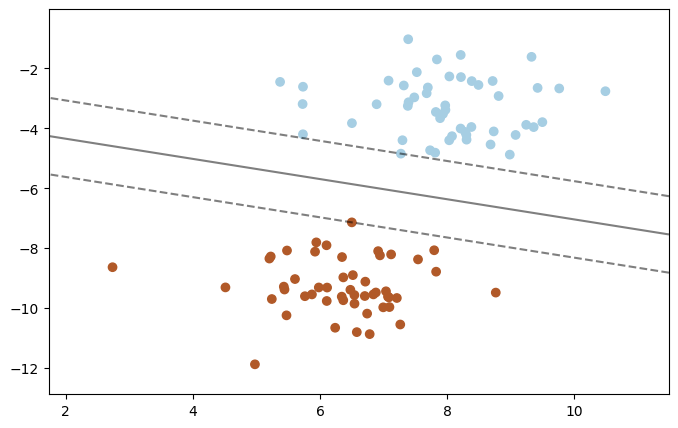

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

DecisionBoundaryDisplay.from_estimator(
    classifier,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax
)

plt.show()

_**Kernel Suport Vector Machines**_

> Another reason why SVMs enjoy high popularity among machine learning practitioners is that they can be easily **_kernelized_** to solve nonlinear classification problems.

- The idea behind **kernel methods** is to map the linearly inseparable data into a higher-dimensional space where the data becomes linearly separable. This is made through a mapping function $\Phi$.
- One of the most famous kernel is the **radial basis function (RBF)** kernel: $$k(x^i, x^j) = exp \Big( - \underbrace{\frac{1}{2 \sigma^2}}_{\gamma} ||x^i - x^j||^2 \Big )$$

> Roughly speaking, the term “kernel” can be interpreted as a similarity function between a pair of examples. The minus sign inverts the distance measure into a similarity score, and, due to the exponential term, the resulting similarity score will fall into a range between 1 (for exactly similar examples) and 0 (for very dissimilar examples).

> The $\gamma$ parameter can be understood as a cut-off parameter for the Gaussian sphere. If we increase the value for $\gamma$, we increase the influence or reach of the training examples, which leads to a tighter and bumpier decision boundary.

***

- Uma coisa que não fica clara é o que ele quer dizer com o produto interno da transformação. Ele coloca $x^{(i)T} x^{j}$. Qual o sentido de multiplicar uma observação do _dataset_ ($x^{(i)}$) por uma coluna inteira de _features_ ($x^{(j)}$)?

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

np.random.seed(1)

X = np.random.randn(400, 2)

y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y, 1, 0)

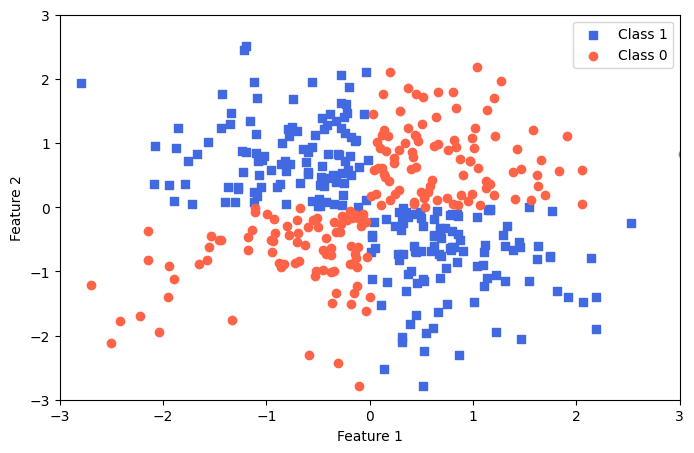

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X[y == 1, 0], X[y == 1, 1], c="royalblue", marker="s", label="Class 1")
ax.scatter(X[y == 0, 0], X[y == 0, 1], c="tomato", marker="o", label="Class 0")

plt.xlim([-3, 3])
plt.ylim([-3, 3])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc="best")

plt.show()

In [22]:
classifier = svm.SVC(kernel="rbf", gamma=0.10)
classifier.fit(X, y)

SVC(gamma=0.1)

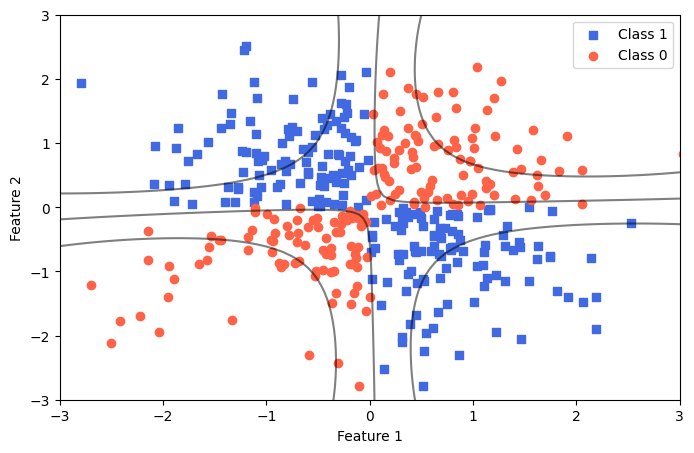

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X[y == 1, 0], X[y == 1, 1], c="royalblue", marker="s", label="Class 1")
ax.scatter(X[y == 0, 0], X[y == 0, 1], c="tomato", marker="o", label="Class 0")


DecisionBoundaryDisplay.from_estimator(
    classifier,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["-"],
    ax=ax
)

plt.xlim([-3, 3])
plt.ylim([-3, 3])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc="best")


plt.show()